In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [7]:
plt.style.use('seaborn')
plt.rc('legend', fontsize=20) # using a size in points
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

In [9]:
def scale(arr, mode=0):
    """scale array by max"""
    newarr = arr / arr.max()
    if mode==1:
        newarr = (arr - arr.min()) / (arr.max()-arr.min())
    return newarr

def get_family(df):
    """get family of opsim"""
    
    return df['db'].split('_')[0]



In [10]:
dblist_all = ['agnddf_v1.5_10yrs.db',
 'alt_dust_v1.5_10yrs.db',
 'alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db',
 'baseline_2snaps_v1.5_10yrs.db',
 'baseline_v1.5_10yrs.db',
 'bulges_bs_v1.5_10yrs.db',
 'bulges_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_bs_v1.5_10yrs.db',
 'bulges_cadence_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_i_heavy_v1.5_10yrs.db',
 'bulges_i_heavy_v1.5_10yrs.db',
 'daily_ddf_v1.5_10yrs.db',
 'dcr_nham1_ug_v1.5_10yrs.db',
 'dcr_nham1_ugr_v1.5_10yrs.db',
 'dcr_nham1_ugri_v1.5_10yrs.db',
 'dcr_nham2_ug_v1.5_10yrs.db',
 'dcr_nham2_ugr_v1.5_10yrs.db',
 'dcr_nham2_ugri_v1.5_10yrs.db',
 'descddf_v1.5_10yrs.db',
 'filterdist_indx1_v1.5_10yrs.db',
 'filterdist_indx2_v1.5_10yrs.db',
 'filterdist_indx3_v1.5_10yrs.db',
 'filterdist_indx4_v1.5_10yrs.db',
 'filterdist_indx5_v1.5_10yrs.db',
 'filterdist_indx6_v1.5_10yrs.db',
 'filterdist_indx7_v1.5_10yrs.db',
 'filterdist_indx8_v1.5_10yrs.db',
 'footprint_add_mag_cloudsv1.5_10yrs.db',
 'footprint_big_sky_dustv1.5_10yrs.db',
 'footprint_big_sky_nouiyv1.5_10yrs.db',
 'footprint_big_skyv1.5_10yrs.db',
 'footprint_big_wfdv1.5_10yrs.db',
 'footprint_bluer_footprintv1.5_10yrs.db',
 'footprint_gp_smoothv1.5_10yrs.db',
 'footprint_newAv1.5_10yrs.db',
 'footprint_newBv1.5_10yrs.db',
 'footprint_no_gp_northv1.5_10yrs.db',
 'footprint_standard_goalsv1.5_10yrs.db',
 'footprint_stuck_rollingv1.5_10yrs.db',
 'goodseeing_gi_v1.5_10yrs.db',
 'goodseeing_gri_v1.5_10yrs.db',
 'goodseeing_griz_v1.5_10yrs.db',
 'goodseeing_gz_v1.5_10yrs.db',
 'goodseeing_i_v1.5_10yrs.db',
 'greedy_footprint_v1.5_10yrs.db',
 'roll_mod2_dust_sdf_0.20_v1.5_10yrs.db',
 'rolling_mod2_sdf_0.10_v1.5_10yrs.db',
 'rolling_mod2_sdf_0.20_v1.5_10yrs.db',
 'rolling_mod3_sdf_0.10_v1.5_10yrs.db',
 'rolling_mod3_sdf_0.20_v1.5_10yrs.db',
 'rolling_mod6_sdf_0.10_v1.5_10yrs.db',
 'rolling_mod6_sdf_0.20_v1.5_10yrs.db',
 'short_exp_2ns_1expt_v1.5_10yrs.db',
 'short_exp_2ns_5expt_v1.5_10yrs.db',
 'short_exp_5ns_1expt_v1.5_10yrs.db',
 'short_exp_5ns_5expt_v1.5_10yrs.db',
 'spiders_v1.5_10yrs.db',
 'third_obs_pt120v1.5_10yrs.db',
 'third_obs_pt15v1.5_10yrs.db',
 'third_obs_pt30v1.5_10yrs.db',
 'third_obs_pt45v1.5_10yrs.db',
 'third_obs_pt60v1.5_10yrs.db',
 'third_obs_pt90v1.5_10yrs.db',
 'twilight_neo_mod1_v1.5_10yrs.db',
 'twilight_neo_mod2_v1.5_10yrs.db',
 'twilight_neo_mod3_v1.5_10yrs.db',
 'twilight_neo_mod4_v1.5_10yrs.db',
 'u60_v1.5_10yrs.db',
 'var_expt_v1.5_10yrs.db',
 'wfd_depth_scale0.65_noddf_v1.5_10yrs.db',
 'wfd_depth_scale0.65_v1.5_10yrs.db',
 'wfd_depth_scale0.70_noddf_v1.5_10yrs.db',
 'wfd_depth_scale0.70_v1.5_10yrs.db',
 'wfd_depth_scale0.75_noddf_v1.5_10yrs.db',
 'wfd_depth_scale0.75_v1.5_10yrs.db',
 'wfd_depth_scale0.80_noddf_v1.5_10yrs.db',
 'wfd_depth_scale0.80_v1.5_10yrs.db',
 'wfd_depth_scale0.85_noddf_v1.5_10yrs.db',
 'wfd_depth_scale0.85_v1.5_10yrs.db',
 'wfd_depth_scale0.90_noddf_v1.5_10yrs.db',
 'wfd_depth_scale0.90_v1.5_10yrs.db',
 'wfd_depth_scale0.95_noddf_v1.5_10yrs.db',
 'wfd_depth_scale0.95_v1.5_10yrs.db',
 'wfd_depth_scale0.99_noddf_v1.5_10yrs.db',
 'wfd_depth_scale0.99_v1.5_10yrs.db']

In [11]:
def plot_barh(df_new, colon, byfamily=True, **kwargs):
    """barh plot of FoM"""

    df_ = df_new.copy()
    df_['total'] = np.sum(df_[ colon ], axis=1)
    
    # get the max FOM of each family and sort by this
    df_mean_family = df_.groupby(by = "family", as_index=False).max()[['family', 'total']]
    df_ = df_.merge(df_mean_family, on='family', how='left', suffixes=['', '_fmean'],)
    
    df_ = df_.set_index('db')
    if byfamily:
        df_ = df_.sort_values(by=['total_fmean', 'total'], ascending=[True, True])
    else:
        # sort by total only
        df_ = df_.sort_values(by='total', ascending=True)
    
    df_[colon] = df_[colon]/len(colon)
    ax = df_[ colon ].plot.barh(stacked=True, figsize=(8, 30), **kwargs)
    
    # get positions of hlines
    if byfamily:
        hlines = df_.groupby(by='family', as_index=False, sort=False).count().cumsum()['total_fmean'].values - 0.5
        hlines = [hlines, hlines]
        ax.plot((-0.5, 1), hlines, 'k-', linewidth=1, alpha=0.5)
    
    plt.xlabel('normalized score', fontsize=20)
    plt.ylabel('')
    plt.legend(loc='lower right', frameon=True)
    plt.xlim([0,1.01])
  

In [12]:
def get_df_norm( fomcsv = 'df_tgapsFoM_GP.csv'):
    """return normalized dataframe"""

    df_fom = pd.read_csv(fomcsv)
    
    if 'db' not in df_fom.columns:
        df_fom['db'] = dblist_all
        
    # scale fom table to 0 and 1
    df_new = df_fom[ ['db'] ].copy()
    for col in cols_all:
        # df_new[ col ] = np.tanh ( scale ( df_fom[col] ) * 3 )
        df_new[col] = scale(df_fom[col]) 
        
    df_new['db'] = df_new['db'].apply(lambda x: x.replace("_v1.5_10yrs.db", "") )
    df_new['db'] = df_new['db'].apply(lambda x: x.replace("v1.5_10yrs.db", "") )
    
    df_new['family'] = df_new.apply(get_family, axis=1)
    
    return df_new

In [8]:
filters = ['u', 'g', 'r', 'i', 'z', 'y']
cols_all = ['uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy', 'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy']

cols_same = [ 'uu',  'gg',  'rr',  'ii',  'zz',  'yy']

cols_diff = ['ug', 'ur', 'ui', 'uz', 'uy', 'gr', 'gi', 'gz', 'gy', 'ri', 'rz', 'ry', 'iz', 'iy', 'zy']



### time gaps galactic plane

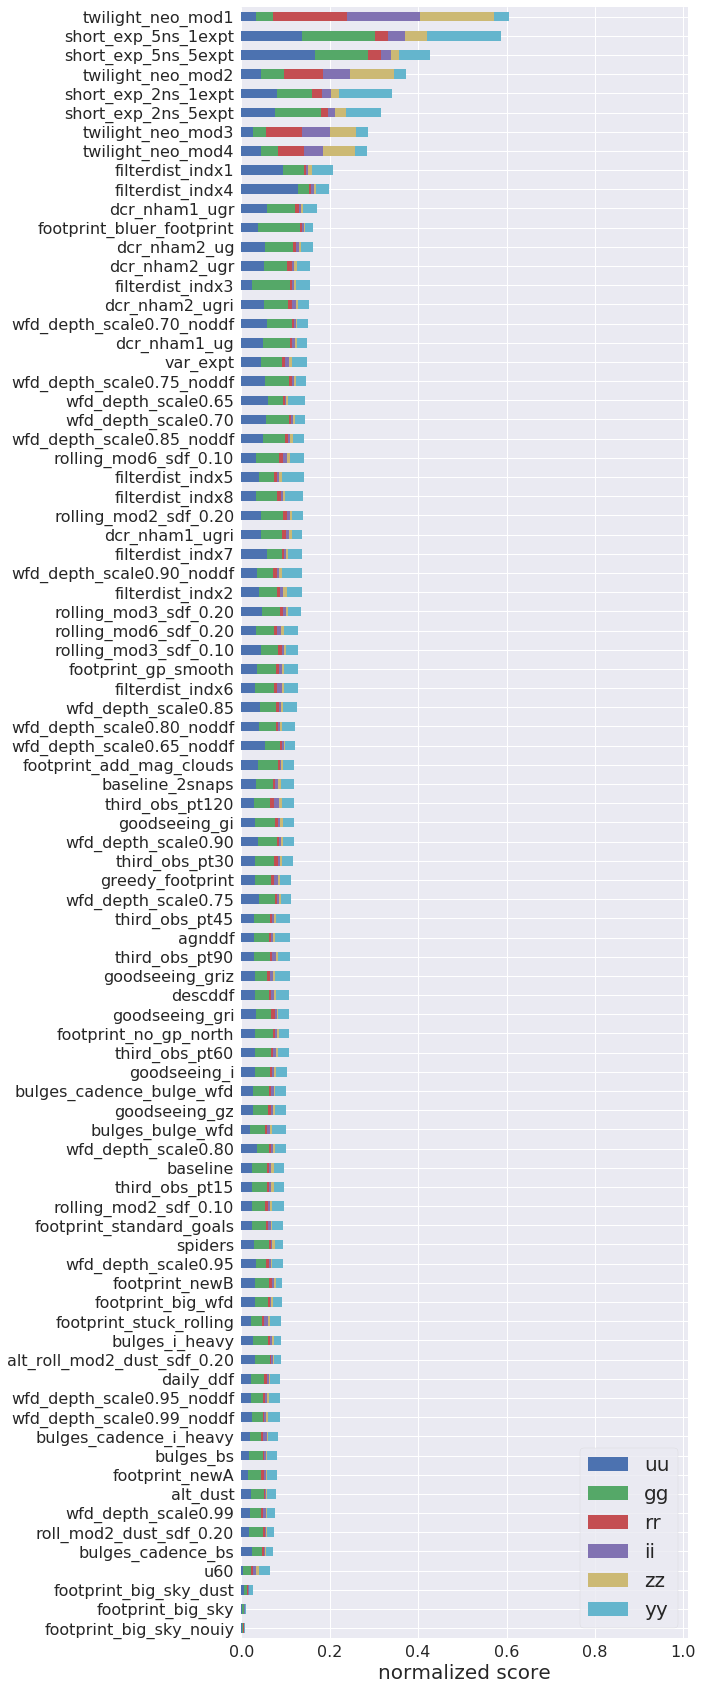

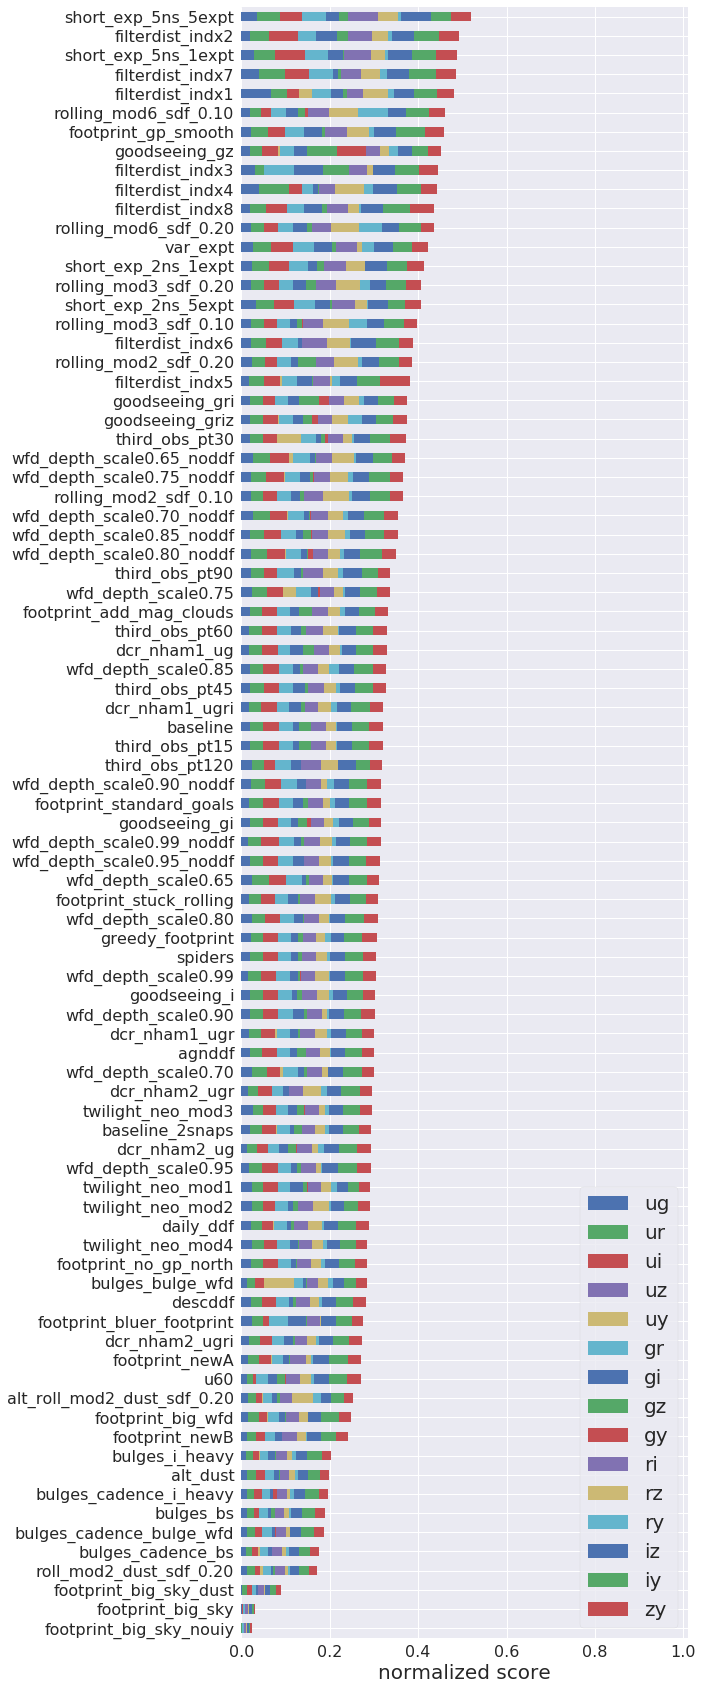

In [20]:
fomcsv = 'df_tgapsFoM_GP.csv'
df_norm = get_df_norm(fomcsv)
plot_barh(df_norm, cols_same, byfamily=False)
plot_barh(df_norm, cols_diff, byfamily=False)

### time gaps LMC

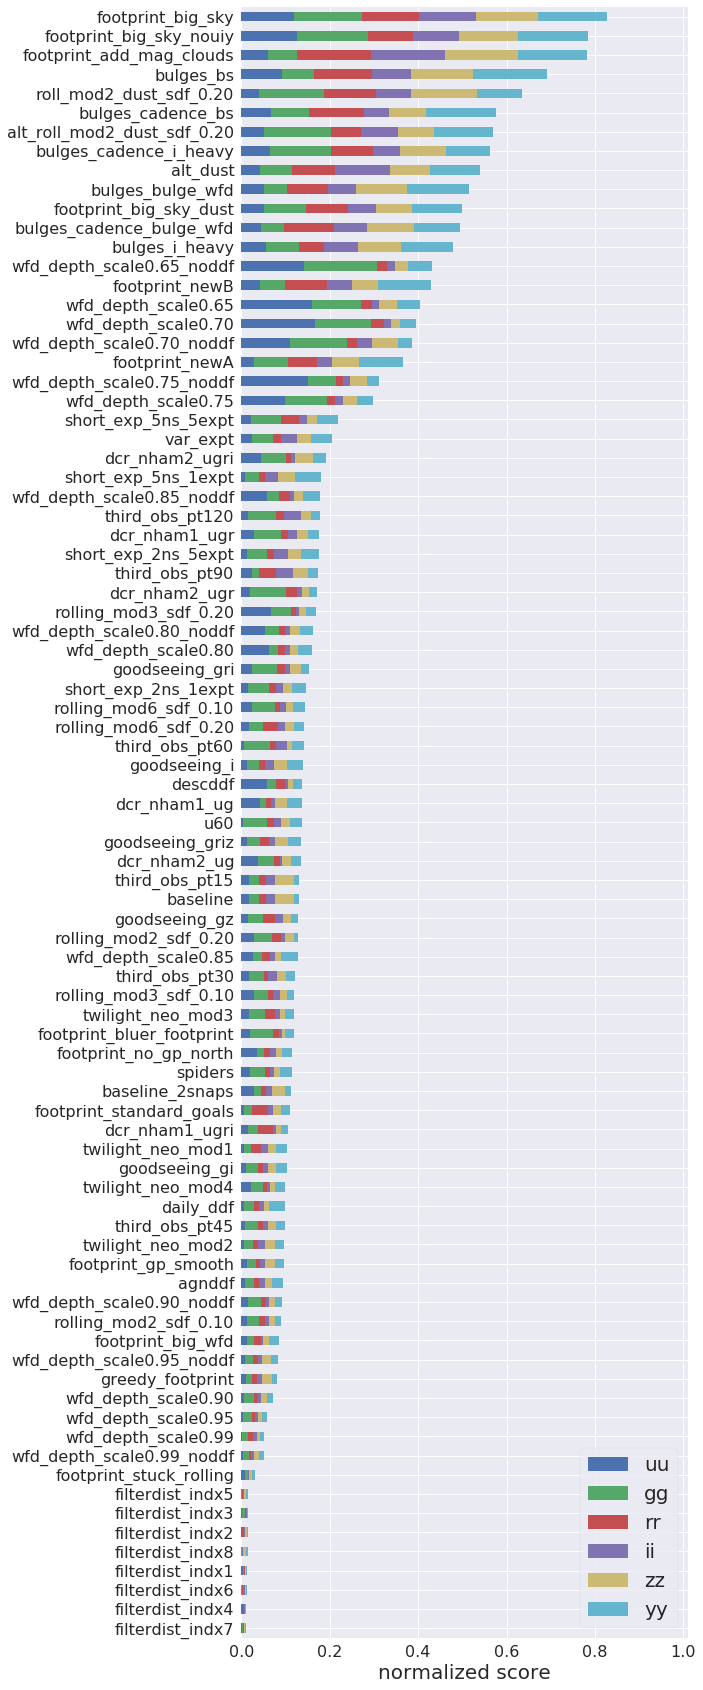

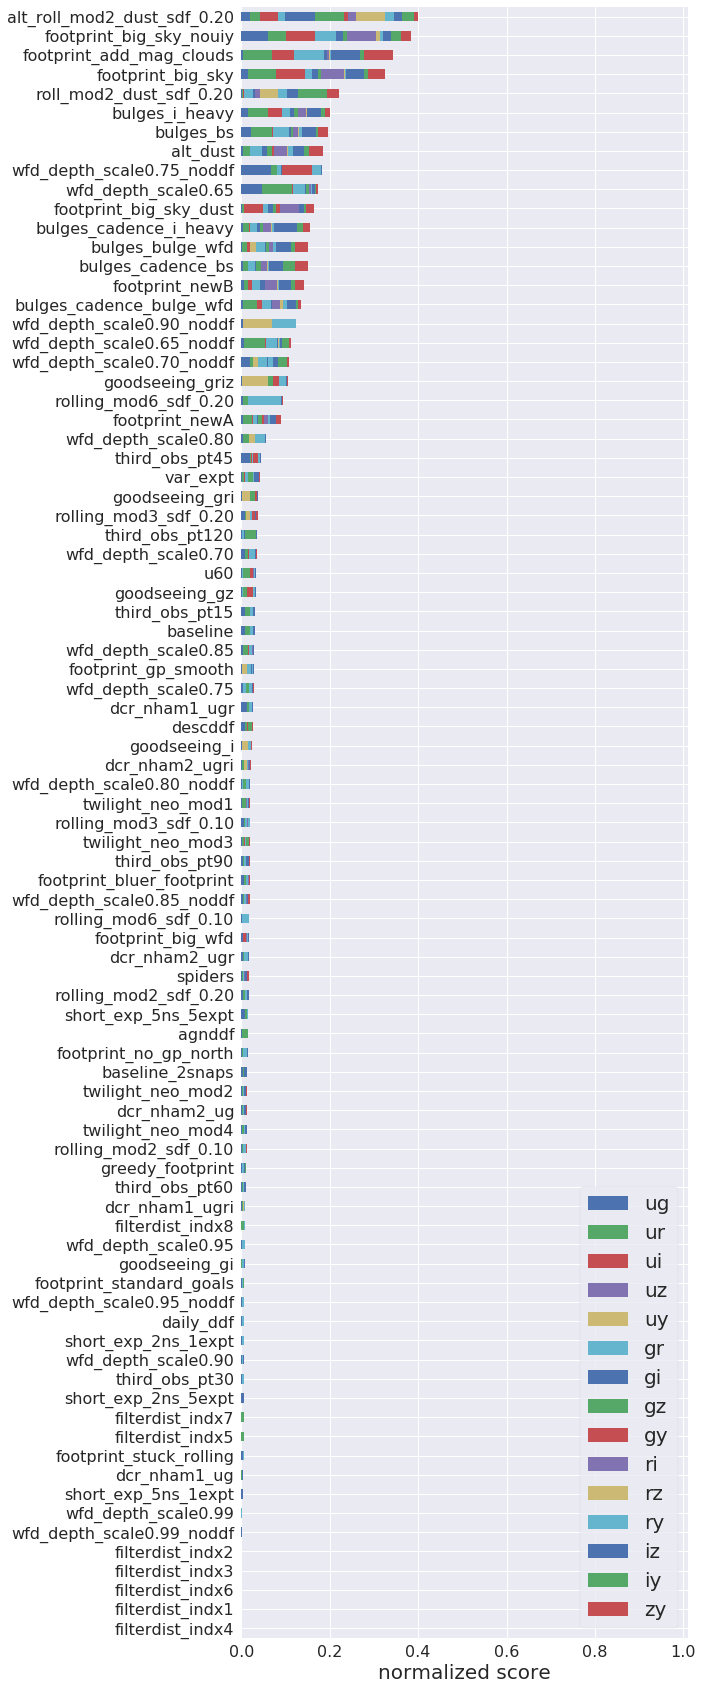

In [18]:
fomcsv = 'df_tgapsFoM_LMC.csv'
df_norm = get_df_norm(fomcsv)
plot_barh(df_norm, cols_same, byfamily=False)
plot_barh(df_norm, cols_diff, byfamily=False)

### time gaps SMC

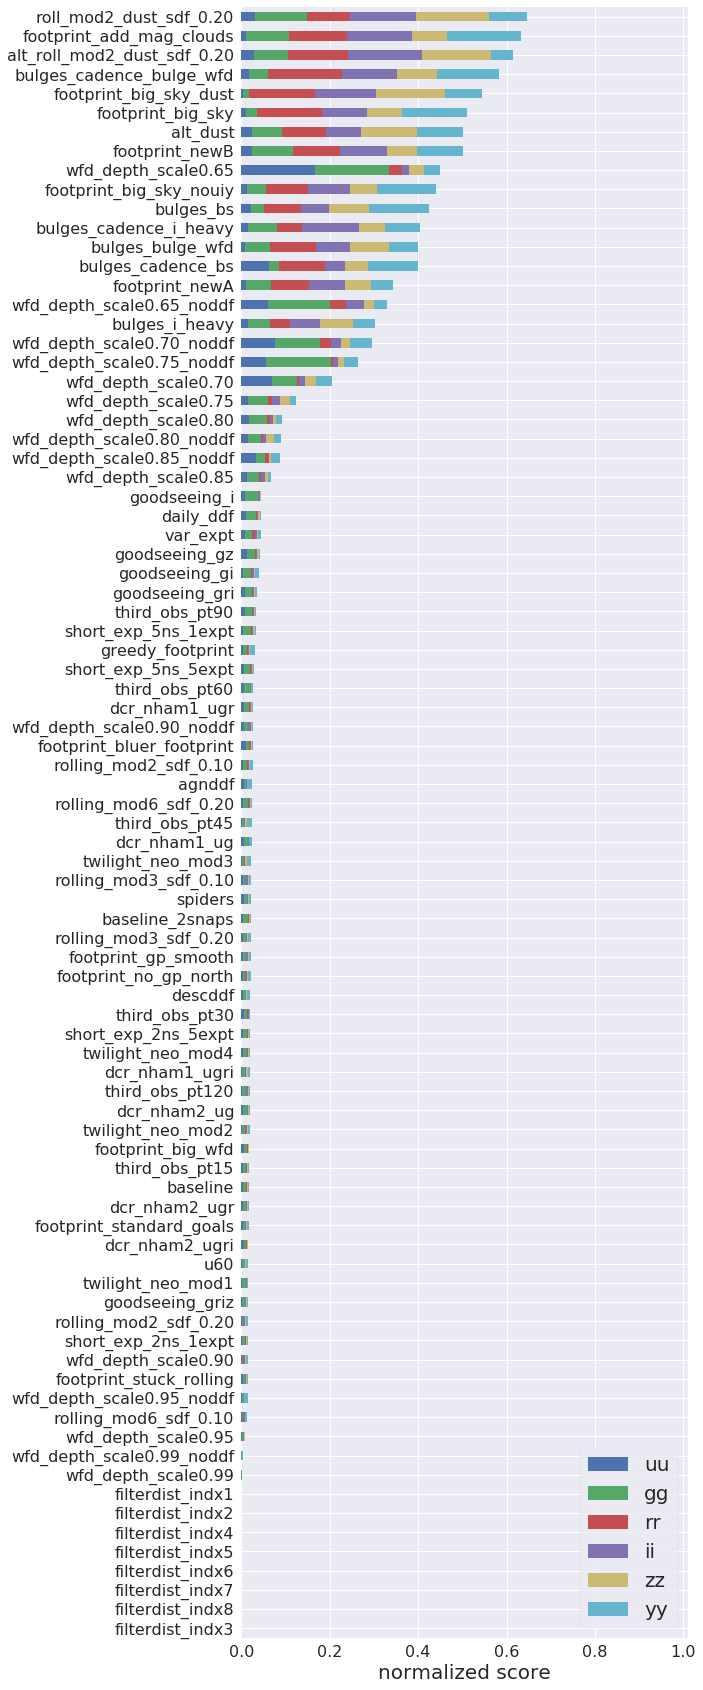

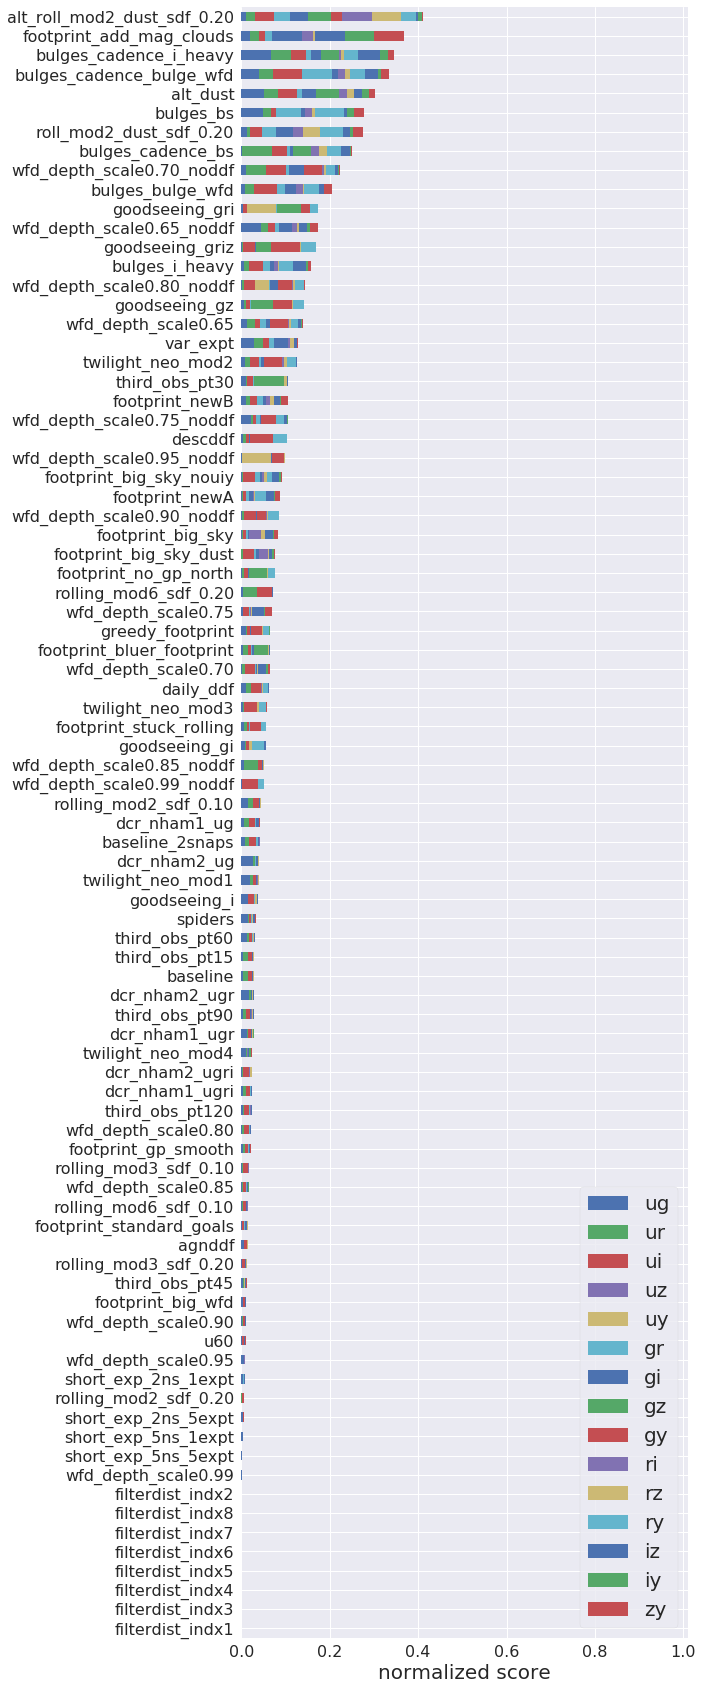

In [19]:
fomcsv = 'df_tgapsFoM_SMC.csv'
df_norm = get_df_norm(fomcsv)
plot_barh(df_norm, cols_same, byfamily=False)
plot_barh(df_norm, cols_diff, byfamily=False)

### Nfields GP

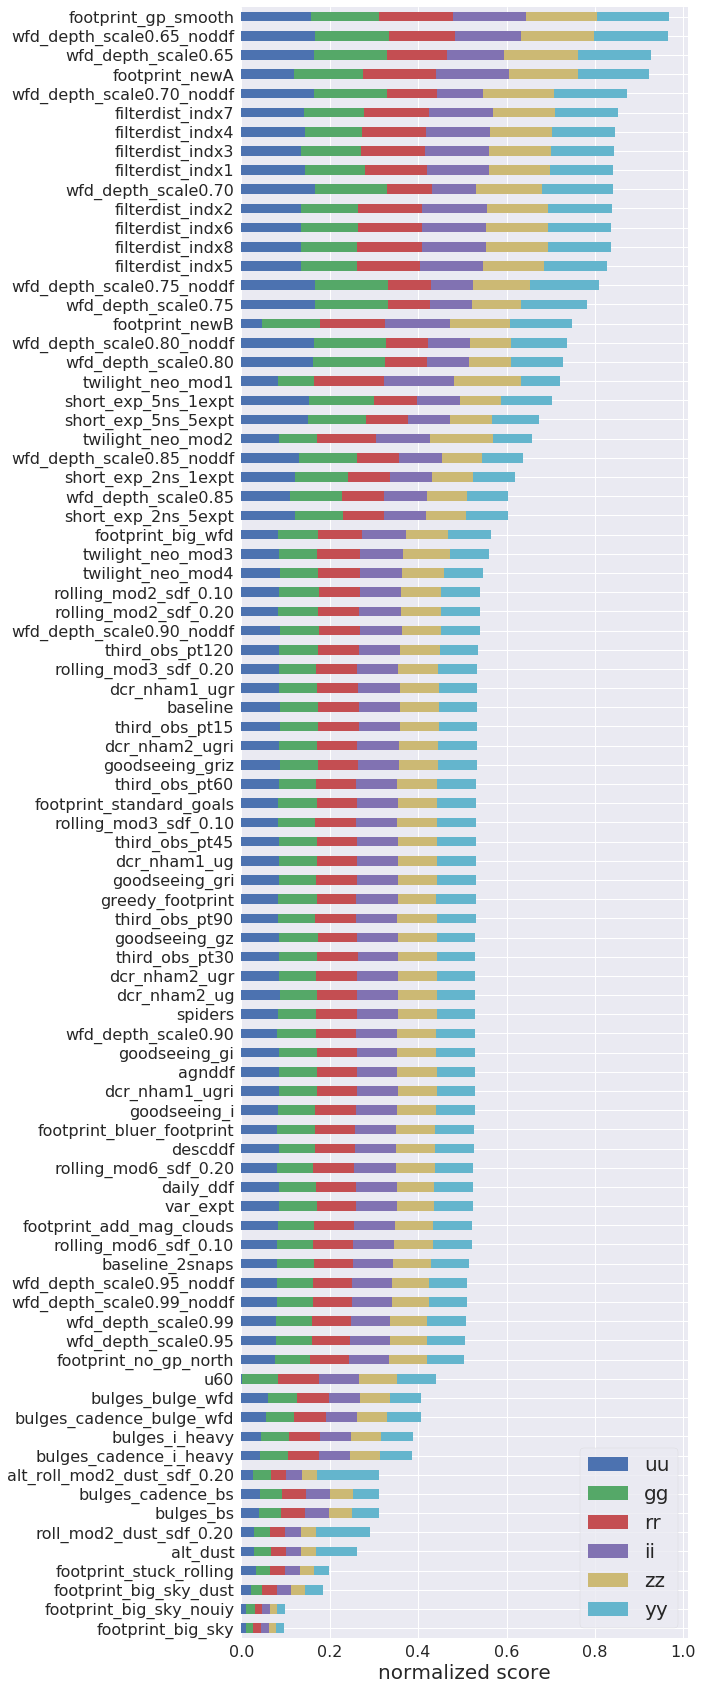

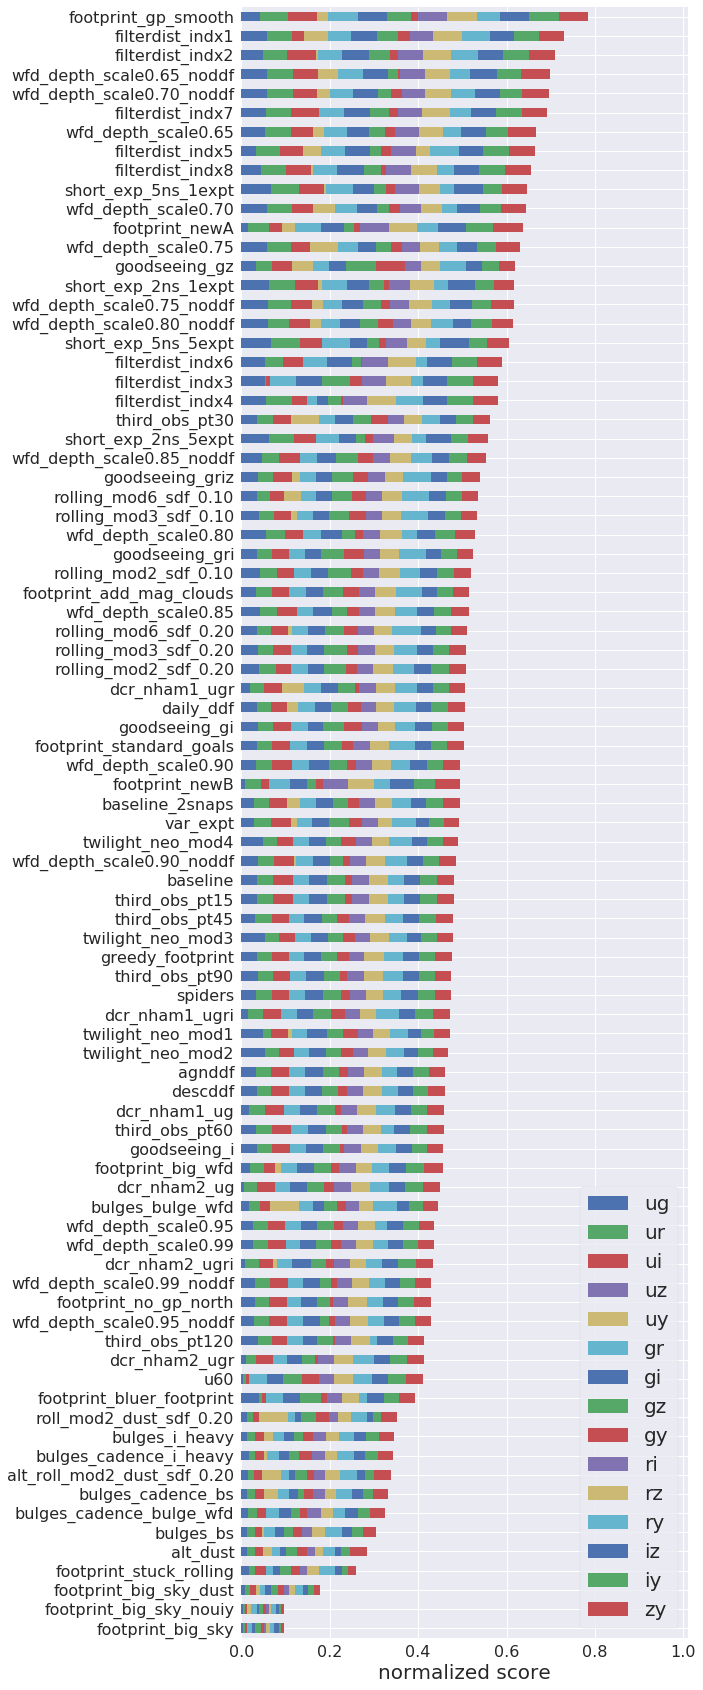

In [22]:
fomcsv = 'df_Nfields_GP.csv'
df_norm = get_df_norm(fomcsv)
plot_barh(df_norm, cols_same, byfamily=False)
plot_barh(df_norm, cols_diff, byfamily=False)

### Nfields LMC

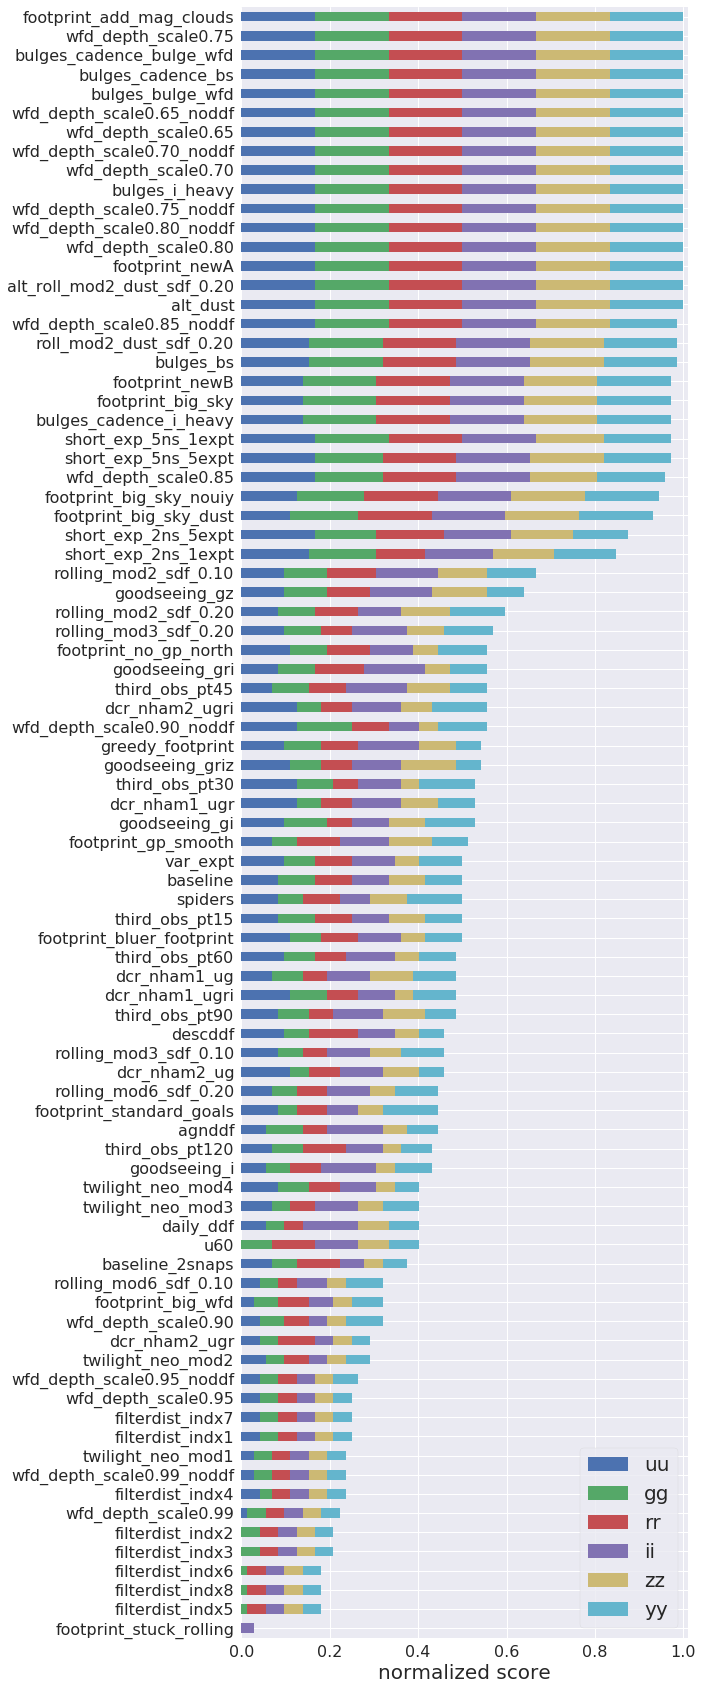

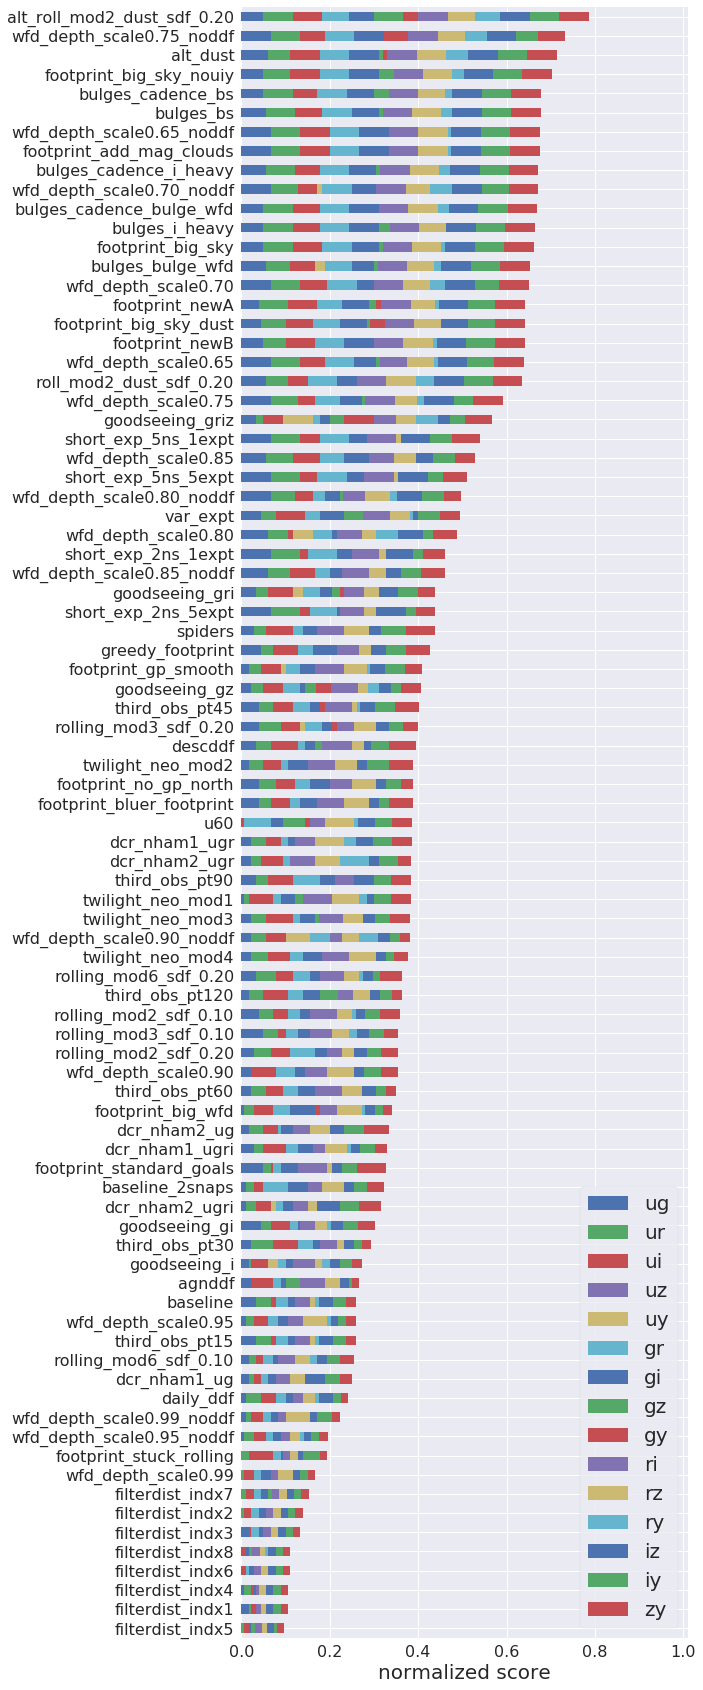

In [23]:
fomcsv = 'df_Nfields_LMC.csv'
df_norm = get_df_norm(fomcsv)
plot_barh(df_norm, cols_same, byfamily=False)
plot_barh(df_norm, cols_diff, byfamily=False)

### Nfields SMC

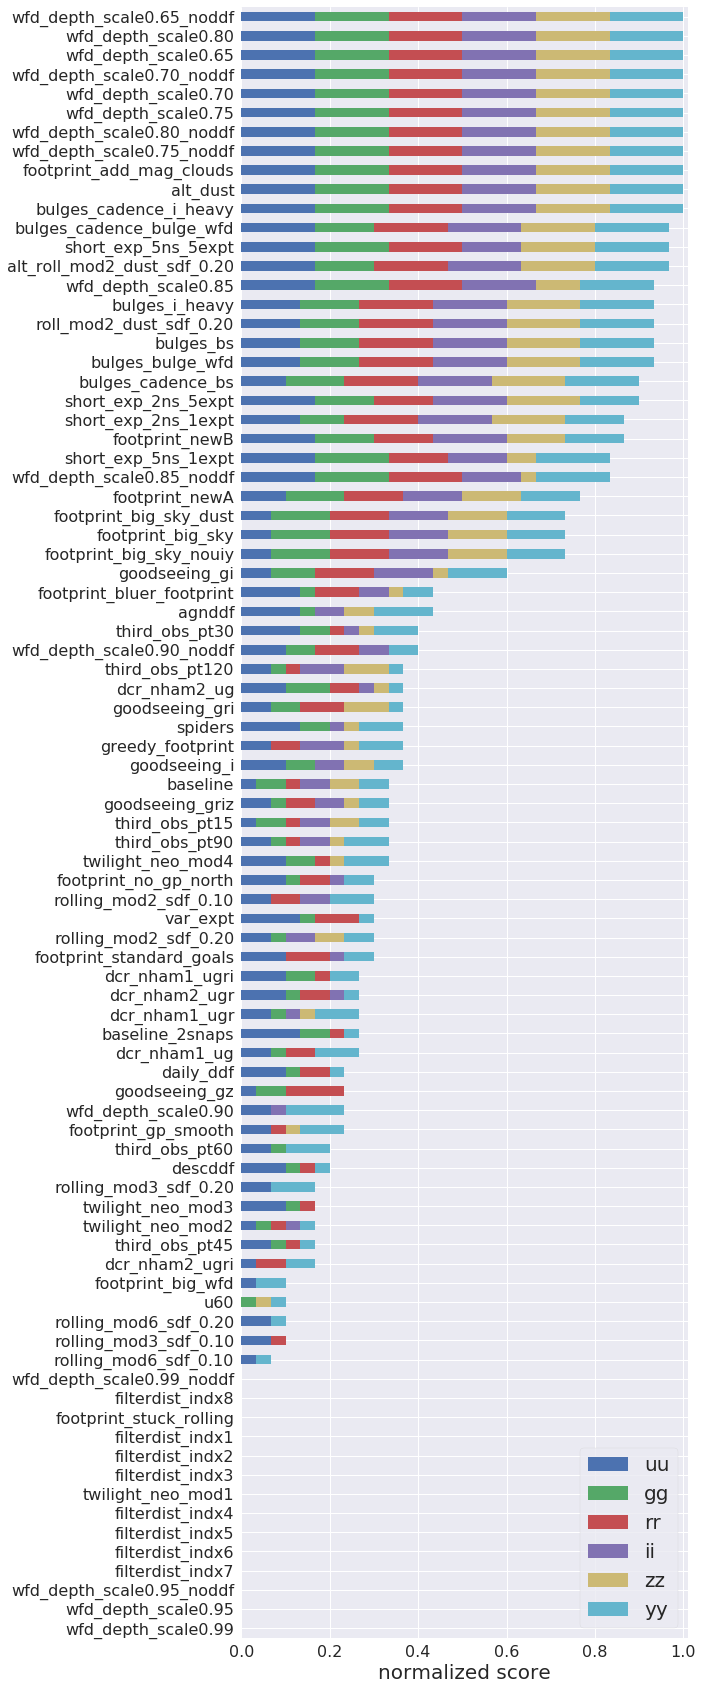

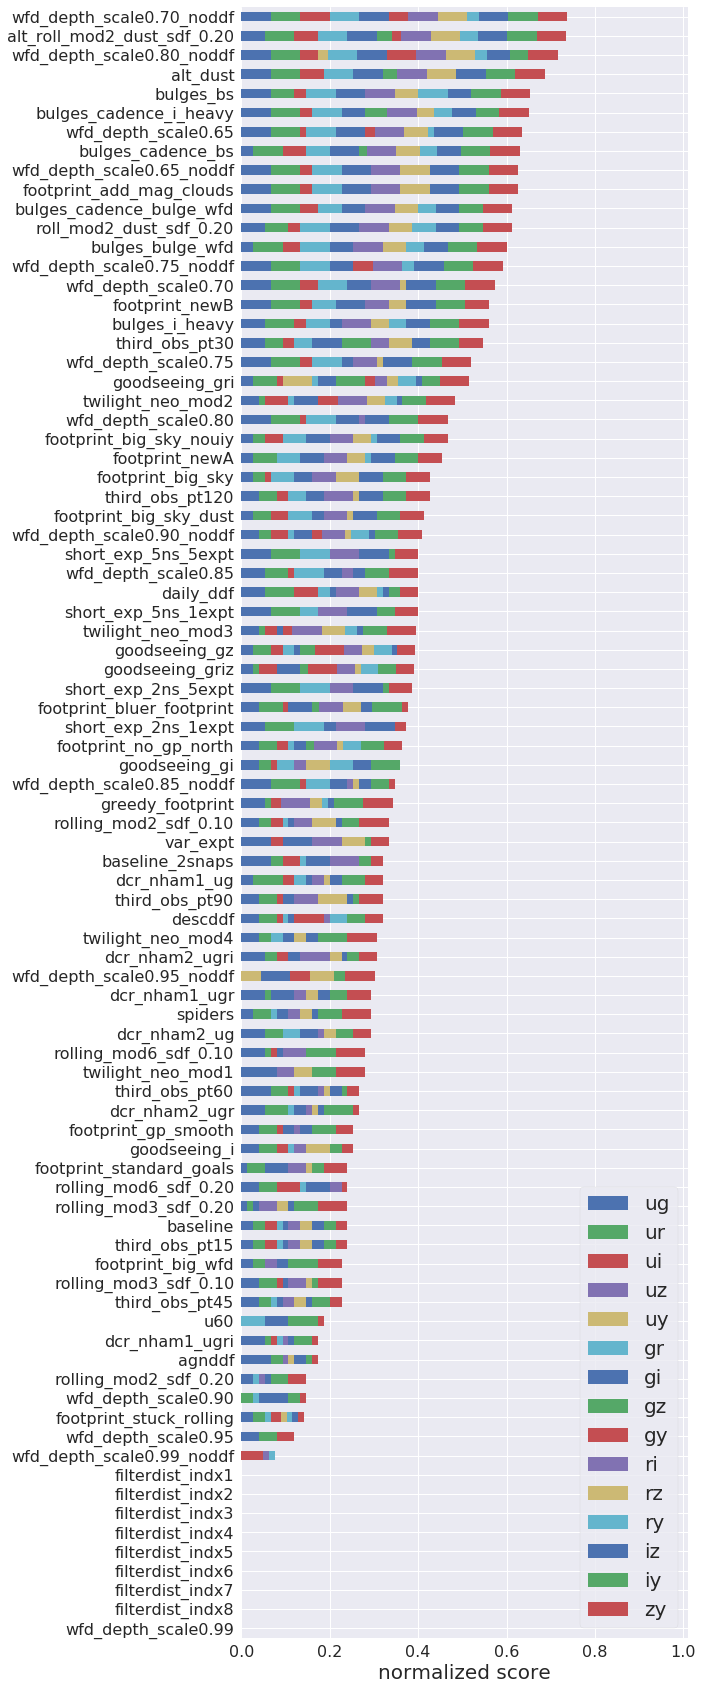

In [24]:
fomcsv = 'df_Nfields_SMC.csv'
df_norm = get_df_norm(fomcsv)
plot_barh(df_norm, cols_same, byfamily=False)
plot_barh(df_norm, cols_diff, byfamily=False)

### Nstars GP

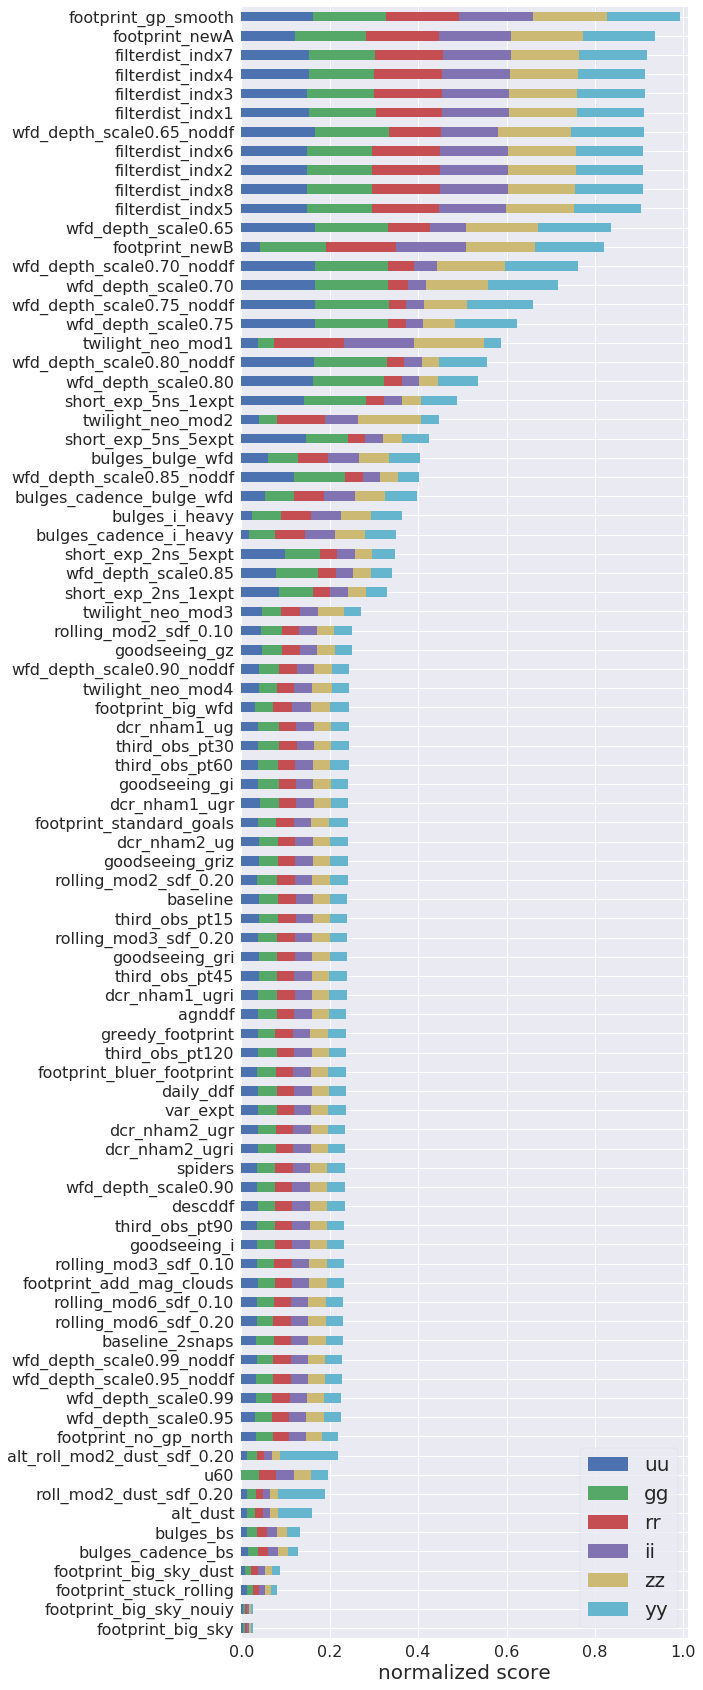

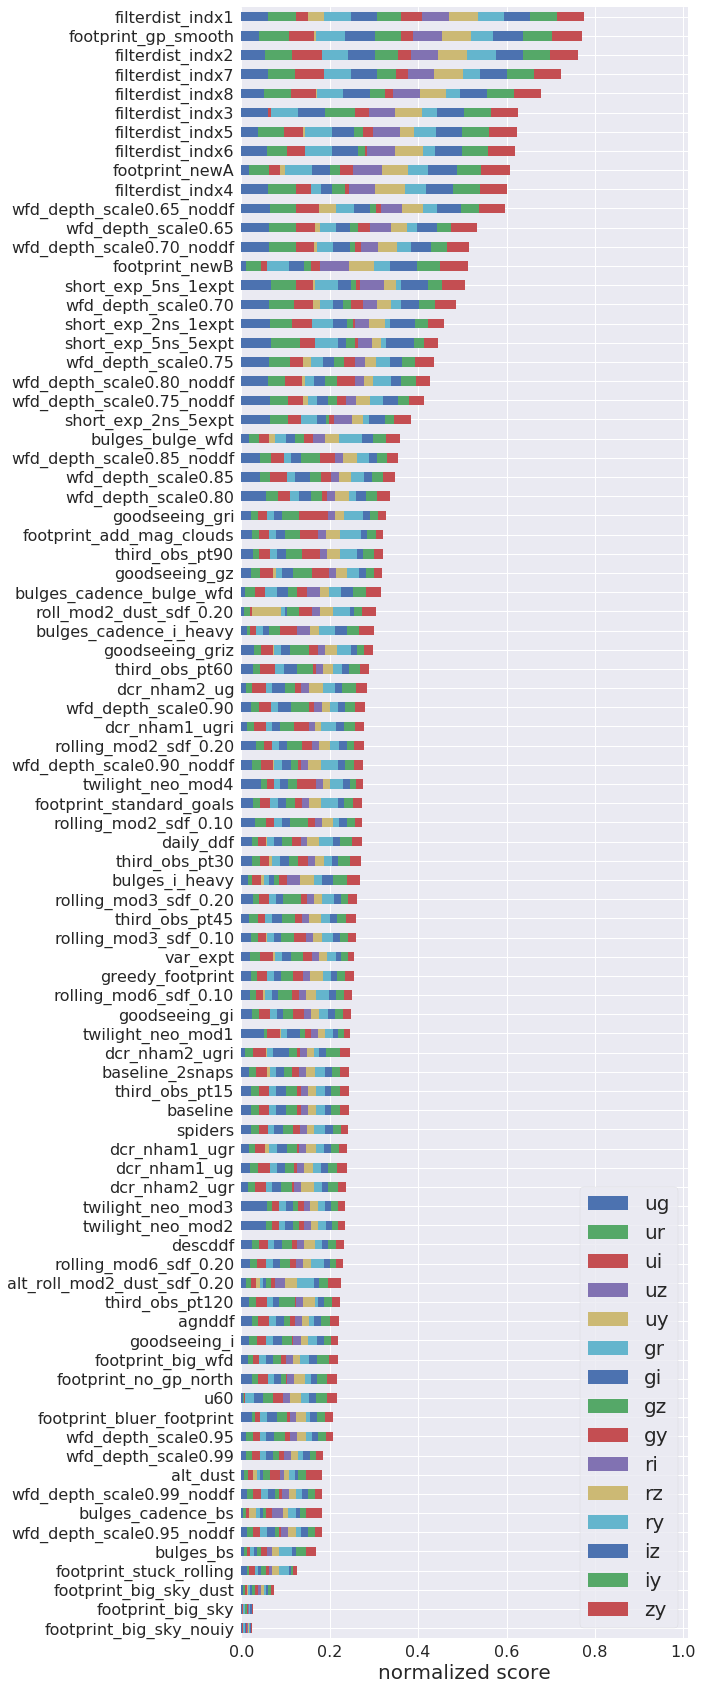

In [25]:
fomcsv = 'df_Nstar_GP.csv'
df_norm = get_df_norm(fomcsv)
plot_barh(df_norm, cols_same, byfamily=False)
plot_barh(df_norm, cols_diff, byfamily=False)

### Nstars LMC

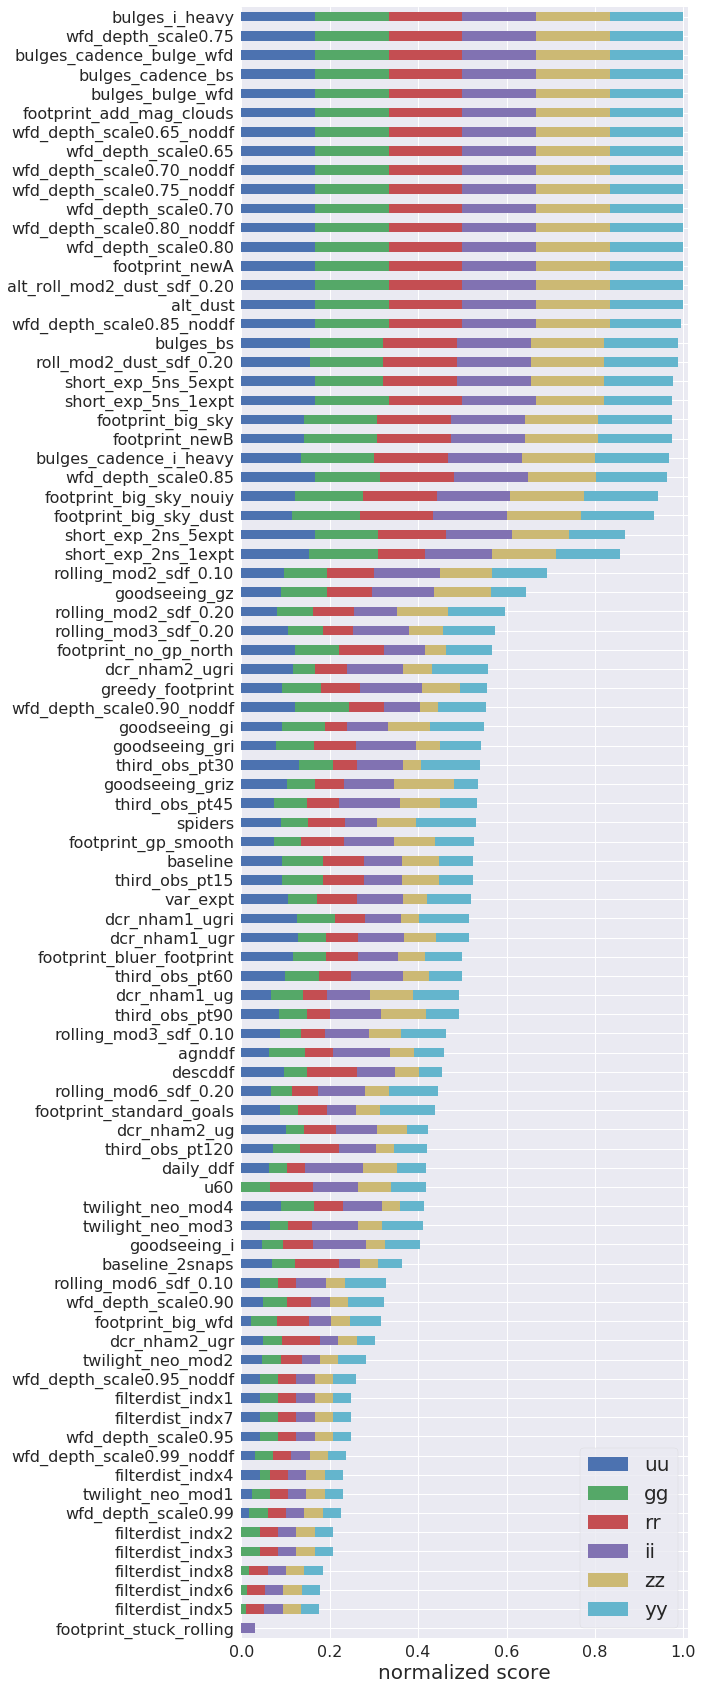

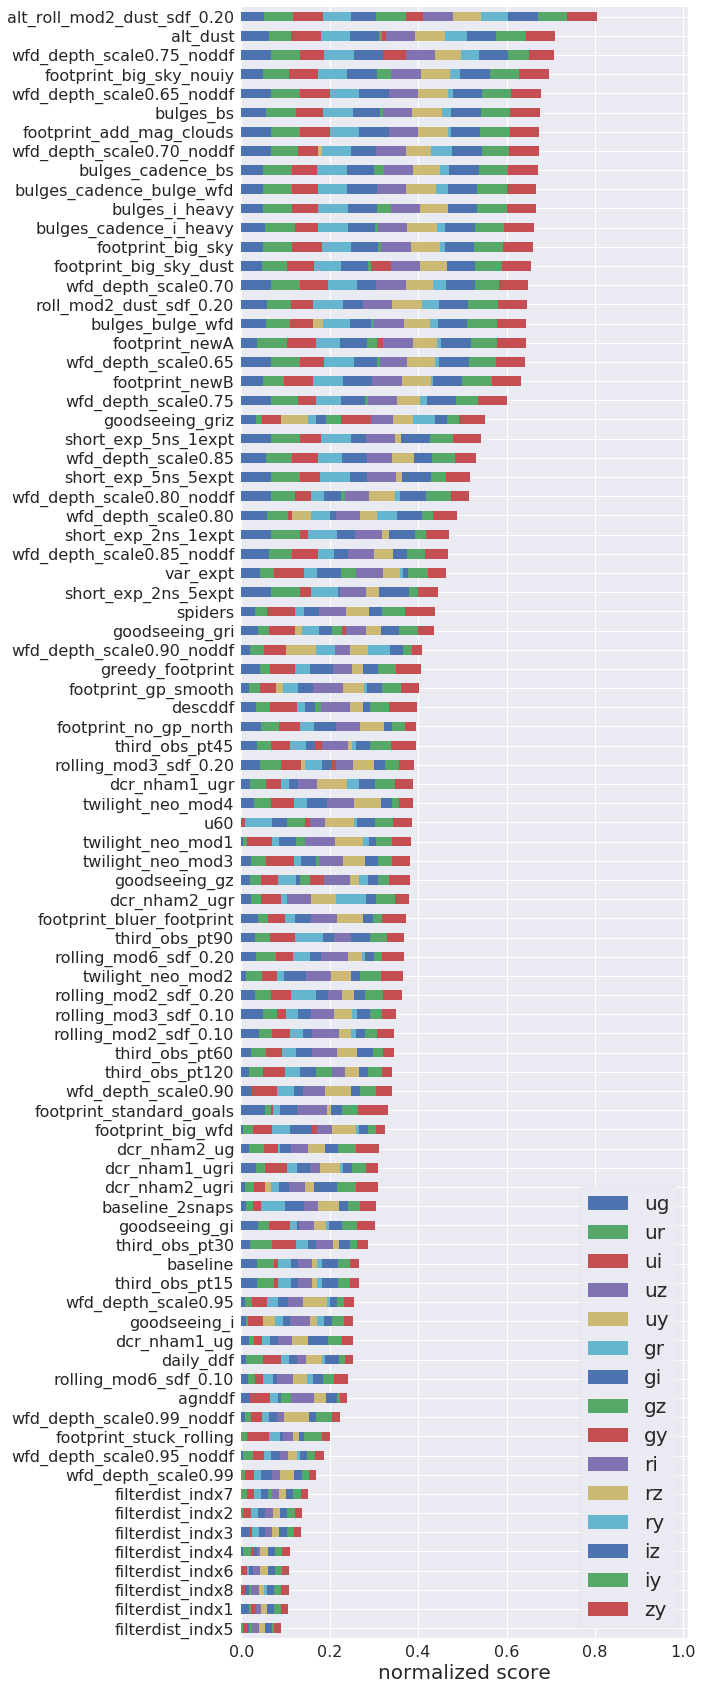

In [26]:
fomcsv = 'df_Nstar_LMC.csv'
df_norm = get_df_norm(fomcsv)
plot_barh(df_norm, cols_same, byfamily=False)
plot_barh(df_norm, cols_diff, byfamily=False)

### Nstars SMC

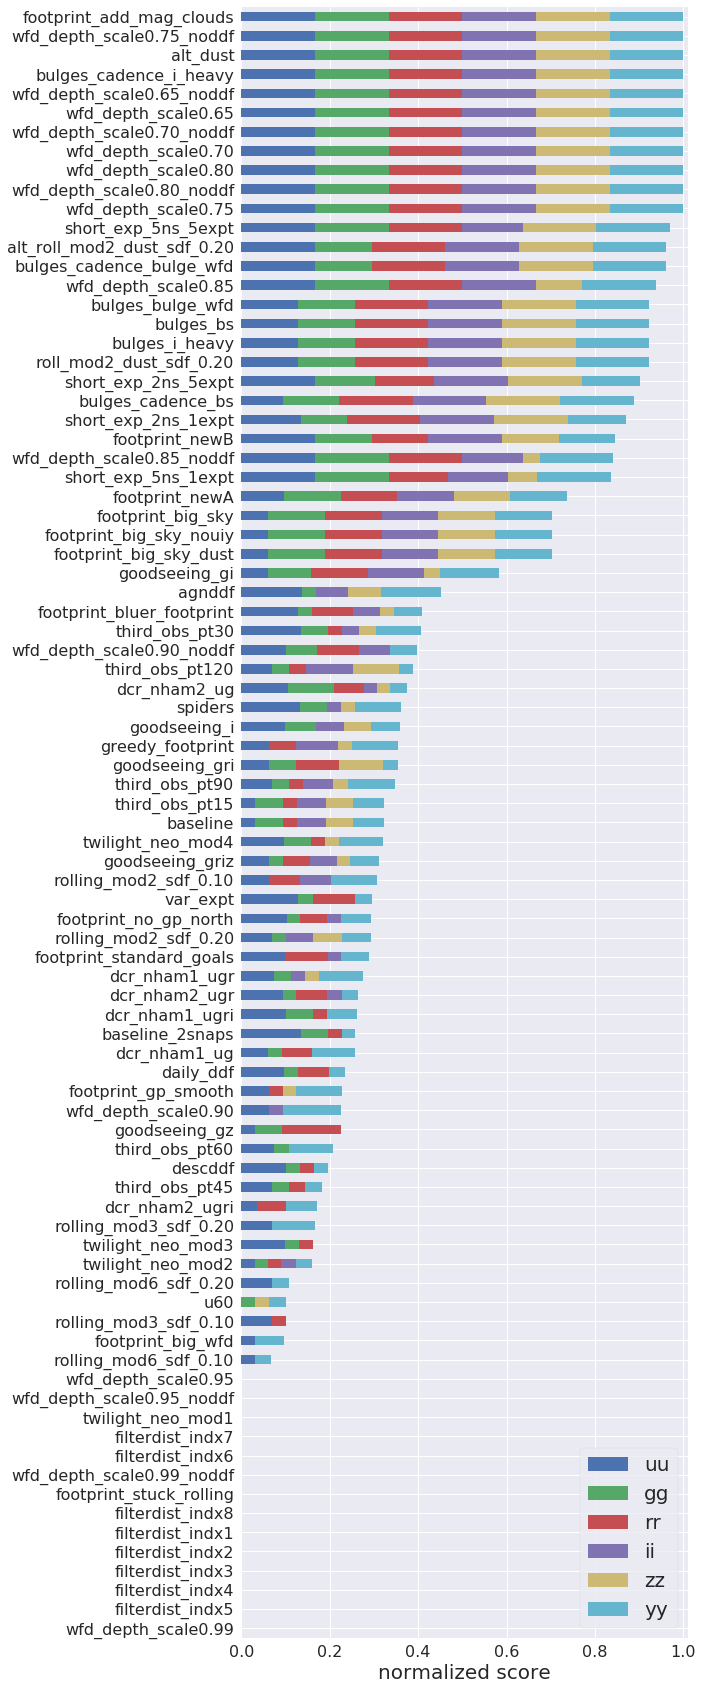

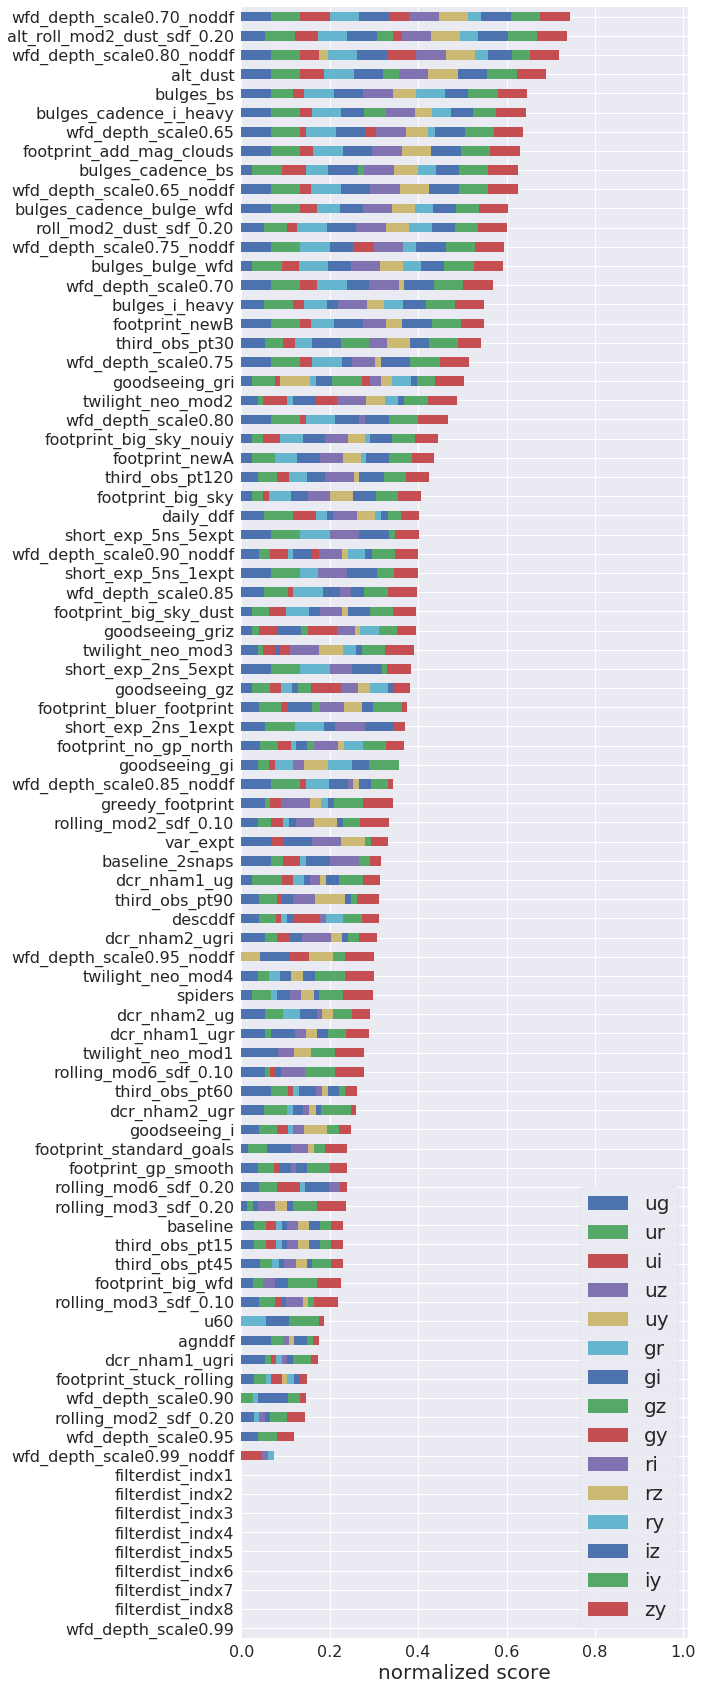

In [27]:
fomcsv = 'df_Nstar_SMC.csv'
df_norm = get_df_norm(fomcsv)
plot_barh(df_norm, cols_same, byfamily=False)
plot_barh(df_norm, cols_diff, byfamily=False)